In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [32]:
# 파일 불러오기
train_data = pd.read_csv('train.csv',header=None)
train_data.head(2)
test_data = pd.read_csv('t10k.csv',header=None)
test_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(1001, 785)

In [33]:
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [4]:
# 합성곱 신경망 모델을 구현하시오.

In [34]:
(train_input,train_target),(test_input,test_target) = keras.datasets.mnist.load_data()

In [35]:
train_scaled = train_input.reshape(-1,28,28,1)/255.0

In [36]:
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [37]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

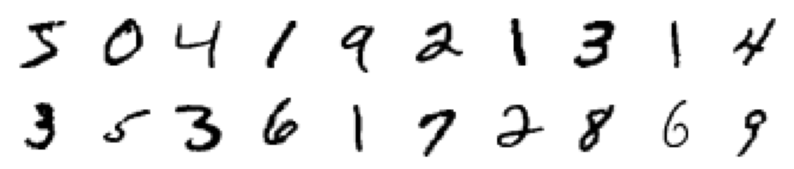

In [38]:
fig,axs= plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')
        
plt.show()

In [39]:
# 1차 합성곱 신경망
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))

c:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
# 2차 합성곱 신경망
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [41]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

In [42]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       156,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,478 (654.21 KB)

 Trainable params: 167,478 (654.21 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8548 - loss: 0.4640 - val_accuracy: 0.9822 - val_loss: 0.0602
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9739 - loss: 0.0810 - val_accuracy: 0.9877 - val_loss: 0.0437
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9801 - loss: 0.0609 - val_accuracy: 0.9890 - val_loss: 0.0396
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9842 - loss: 0.0501 - val_accuracy: 0.9893 - val_loss: 0.0375
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9870 - loss: 0.0399 - val_accuracy: 0.9857 - val_loss: 0.0524
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9892 - val_loss: 0.0391


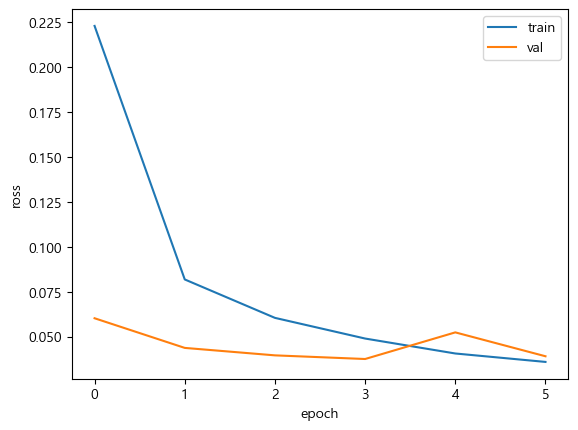

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('ross')
plt.legend(['train','val'])
plt.show()

In [46]:
early_stopping_cb.stopped_epoch

5

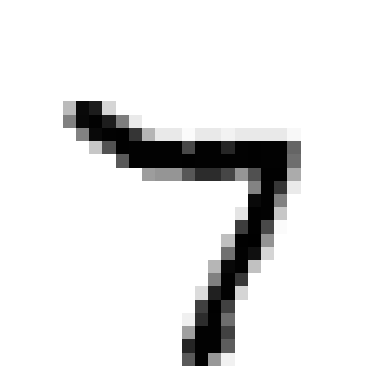

In [47]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [48]:
predict = model.predict(val_scaled[0:1])
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
[[1.2689491e-12 2.6913671e-11 1.0213114e-11 2.4965452e-10 7.9760225e-09
  2.0237392e-10 6.0521053e-17 9.9999976e-01 5.4987830e-11 2.4897656e-07]]


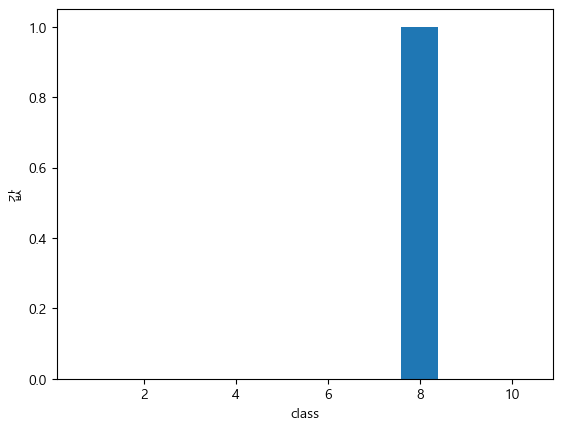

In [49]:
plt.bar(range(1,11),predict[0])
plt.xlabel('class')
plt.ylabel('값')
plt.show()

In [52]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [53]:
print(classes[np.argmax(predict)])  # np.argmax 최대값의 index값을 리턴

스니커즈


In [50]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0394


[0.03752937912940979, 0.9892500042915344]

In [51]:
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9839 - loss: 0.0454


[0.03630058094859123, 0.987500011920929]